#### Importing Modules

In [11]:
from modelsDEA import DEA
import numpy as np
import time
from utils.is_efficient import is_efficient
import matplotlib.pyplot as plt
from utils import arr2matrix, initializeUnif, df2latex, handle_commas, round_elements, plot, plot3d, plotwithfrontier, perpendicular_distance, extend_line
from utils import find_intersection, plot_fdh, initializeZ, load_results

Example of CCR Model

In [12]:
x1 = [4, 7, 8, 4, 2, 10, 3]
x2 = [3, 3, 1, 2, 4, 1, 7]

y = [1, 1, 1, 1, 1, 1, 1]

inp1, out1 = arr2matrix([x1,x2] , [y])

In [15]:
dea1 = DEA(inp1, out1)

In [16]:
dea1.ccr_input()

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2579375
Academic license 2579375 - for non-commercial use only - registered to ma___@iitd.ac.in


,DMU,efficiency,slacks_minus,slacks_plus,Lambda,is_efficient
0,0,0.857143,"[0.0, 0.0]",[0.0],"[0.0, 0.0, 0.0, 0.7142857142857144, 0.28571428...",False
1,1,0.631579,"[0.0, 0.0]",[0.0],"[0.0, 0.0, 0.10526315789473673, 0.894736842105...",False
2,2,1.000000,"[0.0, 0.0]",[0.0],"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",True
3,3,1.000000,"[0.0, 0.0]",[0.0],"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]",True
4,4,1.000000,"[0.0, 0.0]",[0.0],"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",True
5,5,1.000000,"[2.0, 0.0]",[0.0],"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]",False
6,6,0.666667,"[0.0, 0.6666666666666661]",[0.0],"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",False


In [17]:
dea1.save_results()

2024-11-14 18:08:14.078 Python[30189:2230388] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-14 18:08:15.659 Python[30189:2230388] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


Save operation canceled.


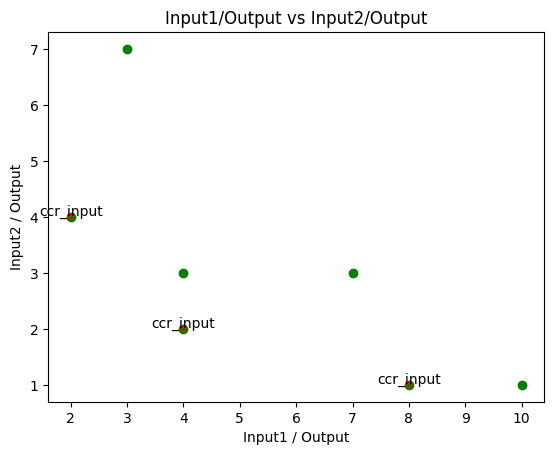

In [18]:
plot(inp1, out1, ['ccr_input'], is_efficient)


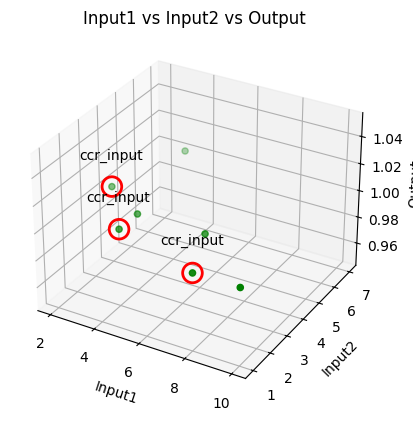

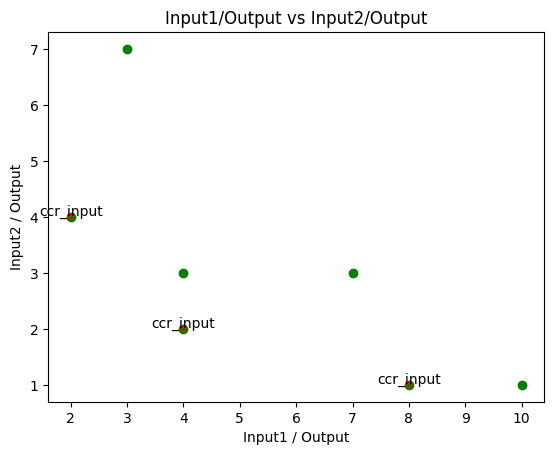

In [19]:
plot3d(inp1, out1, ['ccr_input'], is_efficient)
plot(inp1, out1, ['ccr_input'], is_efficient)


Example to show CCR Efficiency doesn't exceed BCC Efficiency
and the difference in their Efficiency Frontier

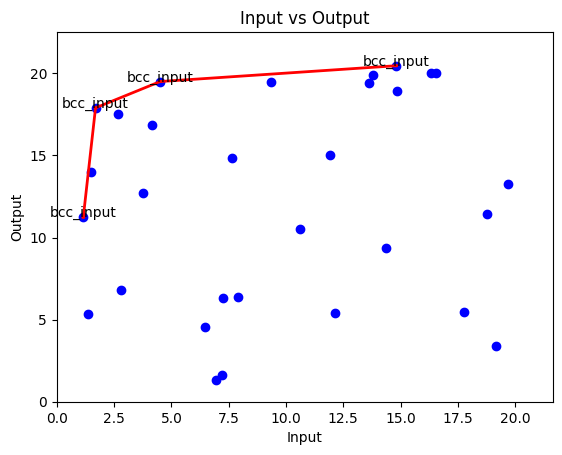

In [20]:
l, m = initializeUnif(30, 1, 1)
plotwithfrontier(l, m, ['bcc_input'], is_efficient)

In [21]:
x1 = [2, 4, 3, 5, 6, ]
y1 = [1, 2, 3, 4, 5]

inp2, out2 = arr2matrix([x1] , [y1])
dea2 = DEA(inp2, out2)

In [22]:
dea2.ccr_input()

,DMU,efficiency,slacks_minus,slacks_plus,Lambda,is_efficient
0,0,0.500000,[0.0],[0.0],"[0.0, 0.0, 0.3333333333333333, 0.0, 0.0]",False
1,1,0.500000,[0.0],[0.0],"[0.0, 0.0, 0.6666666666666666, 0.0, 0.0]",False
2,2,1.000000,[0.0],[0.0],"[0.0, 0.0, 1.0, 0.0, 0.0]",True
3,3,0.800000,[0.0],[0.0],"[0.0, 0.0, 1.3333333333333333, 0.0, 0.0]",False
4,4,0.833333,[0.0],[0.0],"[0.0, 0.0, 1.6666666666666667, 0.0, 0.0]",False


In [23]:
dea2.bcc_input()

,DMU,efficiency,slacks_minus,slacks_plus,Lambda,is_efficient
0,0,1.000,[0.0],[0.0],"[1.0, 0.0, 0.0, 0.0, 0.0]",True
1,1,0.625,[0.0],[0.0],"[0.5, 0.0, 0.5, 0.0, 0.0]",False
2,2,1.000,[0.0],[0.0],"[0.0, 0.0, 1.0, 0.0, 0.0]",True
3,3,0.900,[0.0],[0.0],"[0.0, 0.0, 0.5, 0.0, 0.5]",False
4,4,1.000,[0.0],[0.0],"[0.0, 0.0, 0.0, 0.0, 1.0]",True


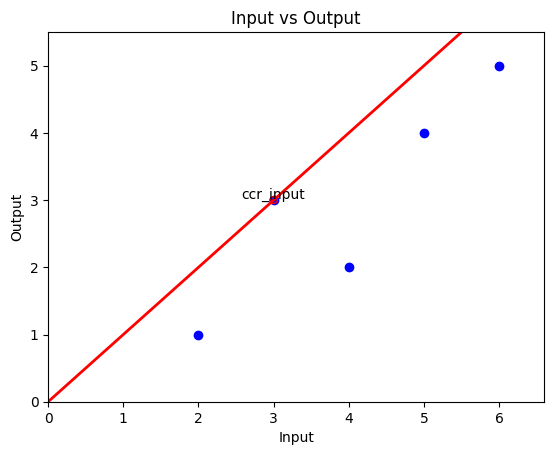

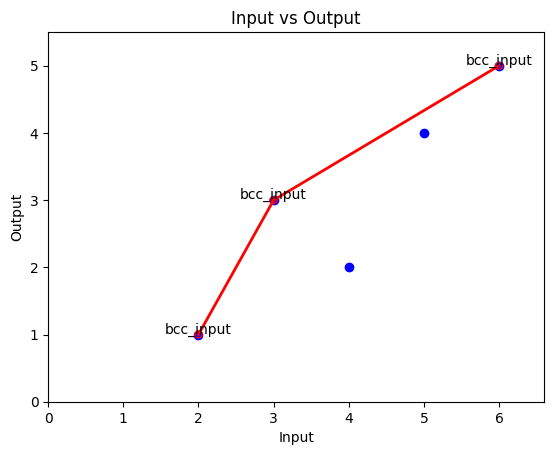

In [24]:
plotwithfrontier(inp2, out2, ['ccr_input'], is_efficient)
plotwithfrontier(inp2, out2, ['bcc_input'], is_efficient)

Example to show difference b/w BCC Input and BCC Output Models

In [26]:
l, m = initializeUnif(30, 1, 2)
dea3 = DEA(l, m)

In [27]:
dea3.bcc_input()

,DMU,efficiency,slacks_minus,slacks_plus,Lambda,is_efficient
0,0,0.433487,[0.0],"[0.0, 0.0]","[0.0, 0.0, 0.1841718882477578, 0.0, 0.0, 0.0, ...",False
1,1,0.922299,[0.0],"[0.0, 5.325454050507636]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.5859402090019397, ...",False
2,2,1.000000,[0.0],"[0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,3,0.193283,[0.0],"[2.022406552369736, 10.354801217283374]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
4,4,0.066794,[0.0],"[0.5281803265272753, 4.874565418492901]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
5,5,1.000000,[0.0],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",True
6,6,0.142322,[0.0],"[0.0, 8.880695881127924]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
7,7,1.000000,[0.0],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",True
8,8,0.196252,[0.0],"[9.418487497736905, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28250622...",False
9,9,0.075198,[0.0],"[0.0, 10.179655508065792]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False


In [28]:
dea3.bcc_output()

,DMU,n,t_minus,t_plus,u,is_efficient
0,0,1.153479,[0.0],"[0.0, 0.0]","[0.0, 0.0, 0.41435546085561153, 0.0, 0.0, 0.0,...",False
1,1,1.012645,[0.0],"[0.0, 4.597173387821218]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.6471460603954803, ...",False
2,2,1.000000,[0.0],"[0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",True
3,3,2.885625,[0.0],"[0.0, 0.8217333914238688]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.4420167828687987, ...",False
4,4,2.338802,[0.8215811886884131],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",False
5,5,1.000000,[0.0],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",True
6,6,1.668369,[0.0],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.5764911904209736, ...",False
7,7,1.000000,[0.0],"[0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",True
8,8,1.329352,[0.0],"[9.16180692920974, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01828759...",False
9,9,1.951676,[0.0],"[0.0, 8.366600809134368]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.1805524087138916, ...",False


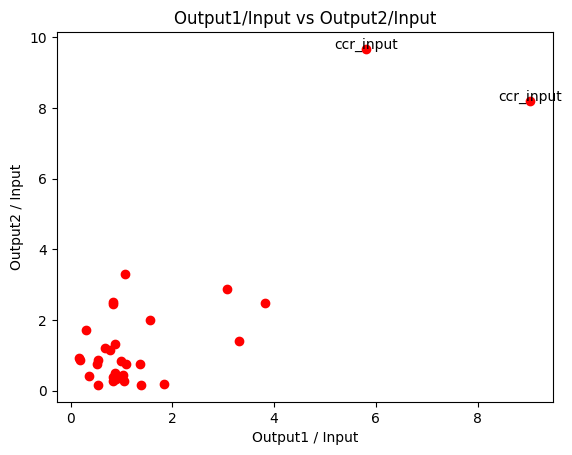

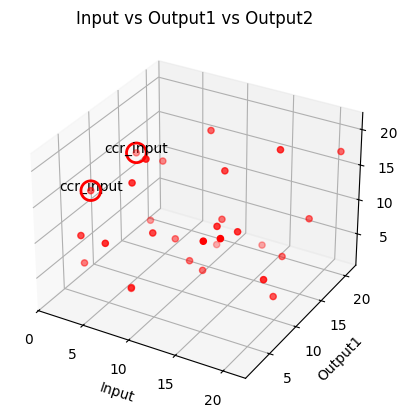

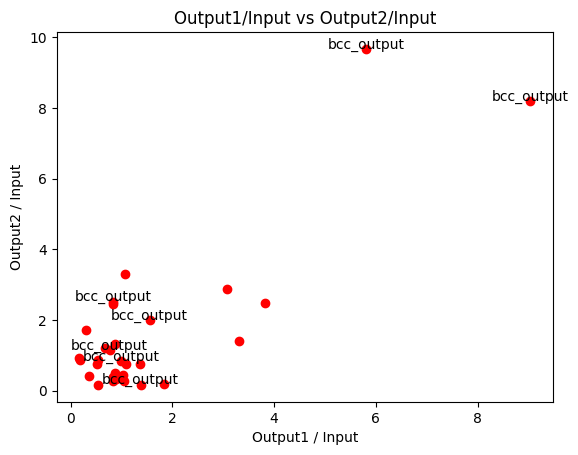

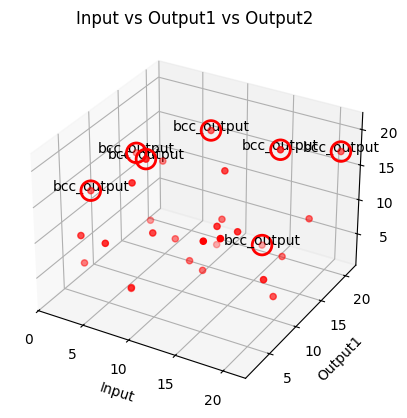

In [32]:
plot(l, m, ['ccr_input'], is_efficient)
plot3d(l, m, ['ccr_input'], is_efficient)

plot(l, m, ['bcc_output'], is_efficient)
plot3d(l, m, ['bcc_output'], is_efficient)

Example to Show ADD Model is Not Unit Invarient

In [34]:
x1 = [2, 4, 3, 5, 6]
y1 = [1, 2, 3, 4, 5]
inp4, out4 = arr2matrix([x1], [y1])
dea4 = DEA(inp4, out4)

In [35]:
is_efficient(dea4.add(), 'add')

,DMU,slacks_minus,slacks_plus,Lambda,is_efficient
0,0,[0.0],[0.0],"[1.0, 0.0, 0.0, 0.0, 0.0]",True
1,1,[1.0],[1.0],"[0.0, 0.0, 1.0, 0.0, 0.0]",False
2,2,[0.0],[0.0],"[0.0, 0.0, 1.0, 0.0, 0.0]",True
3,3,[0.5],[0.0],"[0.0, 0.0, 0.5, 0.0, 0.5]",False
4,4,[0.0],[0.0],"[0.0, 0.0, 0.0, 0.0, 1.0]",True


In [37]:
x1 = [20, 4, 3, 5, 6]
y1 = [1, 2, 3, 4, 5]
inp5, out5 = arr2matrix([x1], [y1])
dea5 = DEA(inp5, out5)

In [38]:
is_efficient(dea5.add(), 'add')

,DMU,slacks_minus,slacks_plus,Lambda,is_efficient
0,0,[17.0],[2.0],"[0.0, 0.0, 1.0, 0.0, 0.0]",False
1,1,[1.0],[1.0],"[0.0, 0.0, 1.0, 0.0, 0.0]",False
2,2,[0.0],[0.0],"[0.0, 0.0, 1.0, 0.0, 0.0]",True
3,3,[0.5],[0.0],"[0.0, 0.0, 0.5, 0.0, 0.5]",False
4,4,[0.0],[0.0],"[0.0, 0.0, 0.0, 0.0, 1.0]",True


Example to show SBM is not Translation Invarient

In [39]:
x1 = [2, 3, 4, 5, 6]
y1 = [5, 7, 6, 9, 10]
y2 = [4, 5, 7, 6, 8]

inp6, out6 = arr2matrix([x1], [y1, y2])
dea6 = DEA(inp6, out6)

In [40]:
dea6.ccr_input()

,DMU,efficiency,slacks_minus,slacks_plus,Lambda,is_efficient
0,0,1.000000,[0.0],"[0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]",True
1,1,0.933333,[0.0],"[0.0, 0.6000000000000005]","[1.4000000000000001, 0.0, 0.0, 0.0, 0.0]",False
2,2,0.875000,[0.0],"[2.75, 0.0]","[1.75, 0.0, 0.0, 0.0, 0.0]",False
3,3,0.720000,[0.0],"[0.0, 1.1999999999999993]","[1.7999999999999998, 0.0, 0.0, 0.0, 0.0]",False
4,4,0.666667,[0.0],"[0.0, 0.0]","[2.0, 0.0, 0.0, 0.0, 0.0]",False


In [41]:
dea6.sbm()

,DMU,rho,lambda,s_minus,s_plus,is_efficient
0,0,1.000000,"[1.0, 0.0, 0.0, 0.0, 0.0]",[0.0],"[0.0, 0.0]",True
1,1,0.880503,"[1.4000000000000004, 0.0, 0.0, 0.0, 0.0]",[0.1999999999999994],"[0.0, 0.6000000000000011]",False
2,2,0.711864,"[1.75, 0.0, 0.0, 0.0, 0.0]",[0.4999999999999998],"[2.750000000000001, 0.0]",False
3,3,0.654545,"[1.8000000000000003, 0.0, 0.0, 0.0, 0.0]",[1.3999999999999997],"[0.0, 1.2000000000000004]",False
4,4,0.666667,"[2.0, 0.0, 0.0, 0.0, 0.0]",[2.0],"[0.0, 0.0]",False


In [42]:
dea7 = DEA(inp6 + 1, out6)

In [43]:
dea7.sbm()

,DMU,rho,lambda,s_minus,s_plus,is_efficient
0,0,1.000000,"[1.0, 0.0, 0.0, 0.0, 0.0]",[0.0],"[0.0, 0.0]",True
1,1,1.000000,"[0.0, 1.0, 0.0, 0.0, 0.0]",[0.0],"[0.0, 0.0]",True
2,2,1.000000,"[0.0, 0.0, 1.0, 0.0, 0.0]",[0.0],"[0.0, 0.0]",True
3,3,0.818182,"[1.8000000000000003, 0.0, 0.0, 0.0, 0.0]",[0.5999999999999998],"[0.0, 1.2000000000000004]",False
4,4,0.857143,"[2.0, 0.0, 0.0, 0.0, 0.0]",[1.0],"[0.0, 0.0]",False


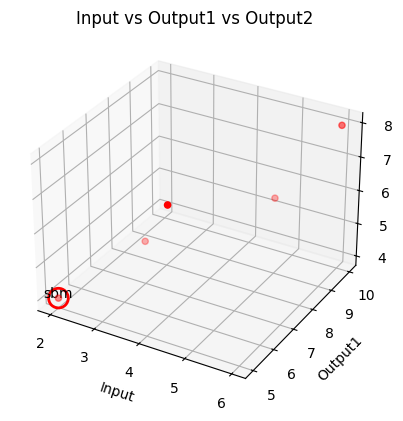

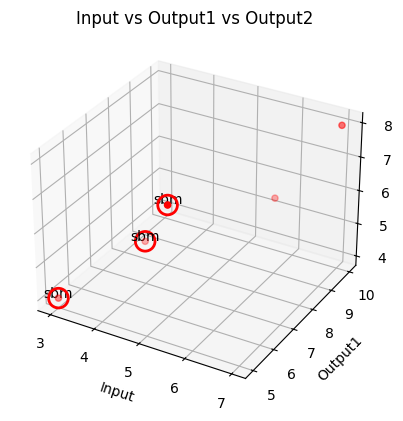

In [44]:
plot3d(inp6, out6, ['sbm'], is_efficient)
plot3d(inp6+1, out6, ['sbm'], is_efficient)

In [47]:
l=[13,11,4,11,9,5,7,19,16,13]

In [48]:
m=[19,18,7,14,4,15,9,3,15,3]

In [49]:
inp12, out12 = arr2matrix([l], [m])
dea12 = DEA(inp12, out12)

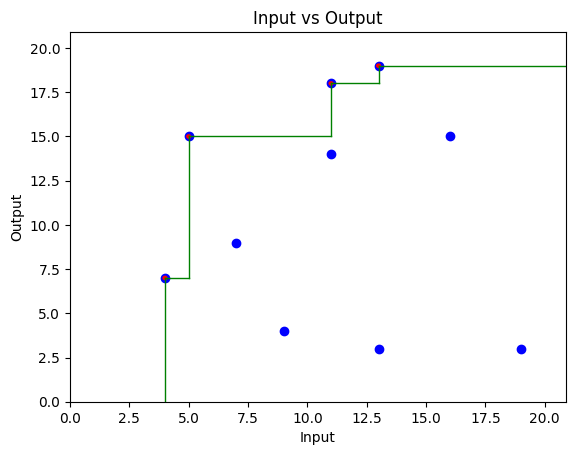

In [50]:
plot_fdh(inp12, out12, ['fdh_input_vrs'], is_efficient)

In [51]:
dea12.fdh_output_vrs()

,DMU,efficiency,is_efficient
0,0,1.000000,True
1,1,1.000000,True
2,2,1.000000,True
3,3,1.285714,False
4,4,3.750000,False
5,5,1.000000,True
6,6,1.666667,False
7,7,6.333333,False
8,8,1.266667,False
9,9,6.333333,False


Unsupported type: fdh_input_crs


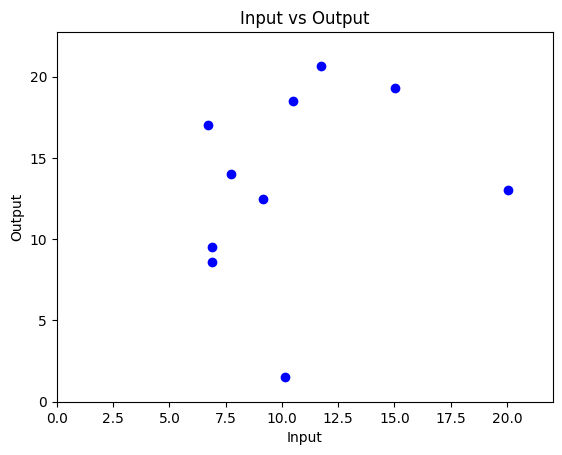

In [52]:
l, m = initializeUnif(10, 1, 1)
plot_fdh(l, m, ['fdh_input_crs'], is_efficient)

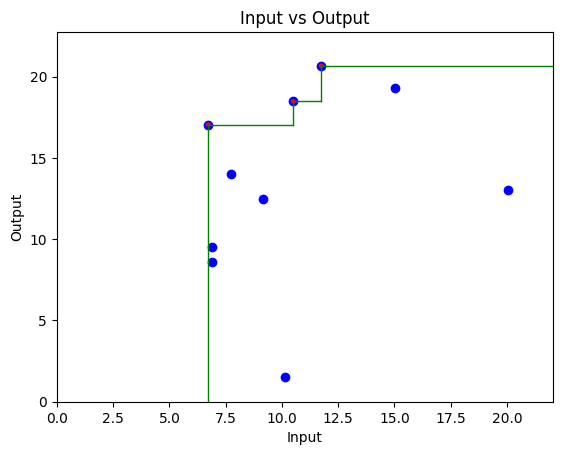

In [54]:
plot_fdh(l, m, ['fdh_input_vrs'], is_efficient)

In [ ]:
input1 = [24, 15, 21, 27, 25, 13, 5, 22, 12, 1, 8, 26, 14, 23, 16, 10, 7, 2, 18, 9, 19, 4, 6, 28, 17, 30, 3, 11, 20, 29]
output1 = [30, 19, 17, 2, 3, 6, 10, 7, 5, 1, 14, 4, 28, 16, 29, 12, 11, 13, 24, 18, 9, 20, 27, 21, 8, 25, 26, 22, 15, 23]

l, m = arr2matrix([input1] , [output1])
dea = DEA(l, m)
